In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [3]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [4]:
schema_fname = pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText

In [5]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [6]:
survey_df = survey_raw_df[selected_columns].copy()

In [7]:
schema = schema_fname[selected_columns]

In [8]:
survey_df.shape

(64461, 20)

In [9]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [10]:
survey_df.describe()

,Age,WorkWeekHrs
count,45446.000000,41151.000000
mean,30.834111,40.782174
std,9.585392,17.816383
min,1.000000,1.000000
25%,24.000000,40.000000
50%,29.000000,40.000000
75%,35.000000,44.000000
max,279.000000,475.000000


In [11]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs < 8].index,inplace=True)

In [12]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [13]:
survey_df.drop(survey_df[survey_df.Age > 80].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age < 15].index,inplace=True)

In [14]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 100].index,inplace=True)

In [15]:
survey_df.Gender.value_counts()

Man                                                            45400
Woman                                                           3807
Non-binary, genderqueer, or gender non-conforming                376
Man;Non-binary, genderqueer, or gender non-conforming            120
Woman;Non-binary, genderqueer, or gender non-conforming           91
Woman;Man                                                         70
Woman;Man;Non-binary, genderqueer, or gender non-conforming       23
Name: Gender, dtype: int64

In [16]:
survey_df['Gender'].replace({'Non-binary, genderqueer, or gender non-conforming':'Other','Woman;Non-binary, genderqueer, or gender non-conforming':'Other',
'Woman;Non-binary, genderqueer, or gender non-conforming':'Other','Woman;Man':'Other','Woman;Man;Non-binary, genderqueer, or gender non-conforming':'Other','Man;Non-binary, genderqueer, or gender non-conforming':'Other' },inplace=True)

In [17]:
schema.Country

'Where do you live?'

In [18]:
top_countries = survey_df.Country.value_counts().head(15)

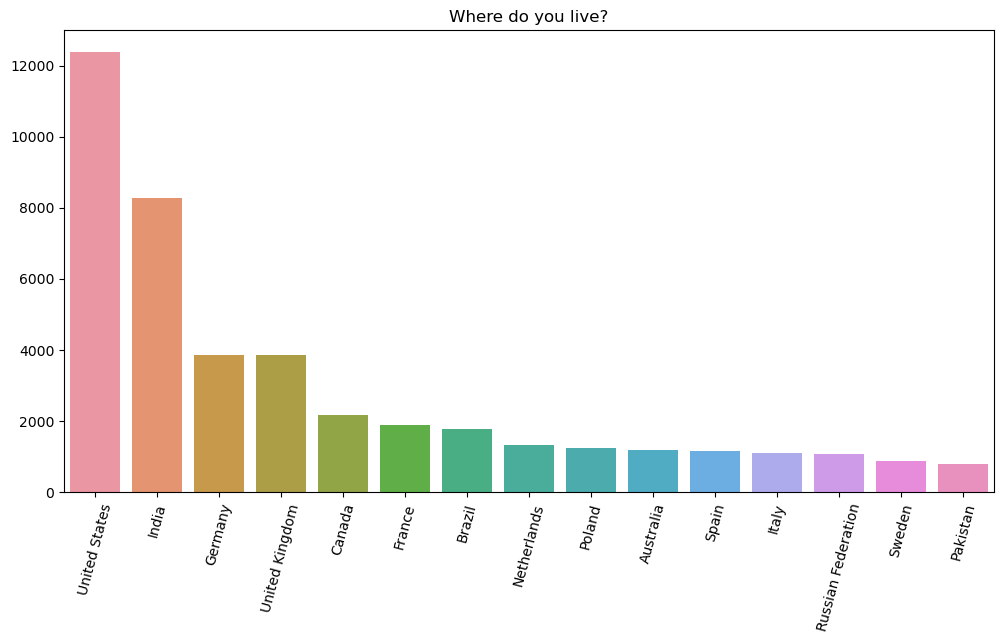

In [19]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index,y=top_countries.values);

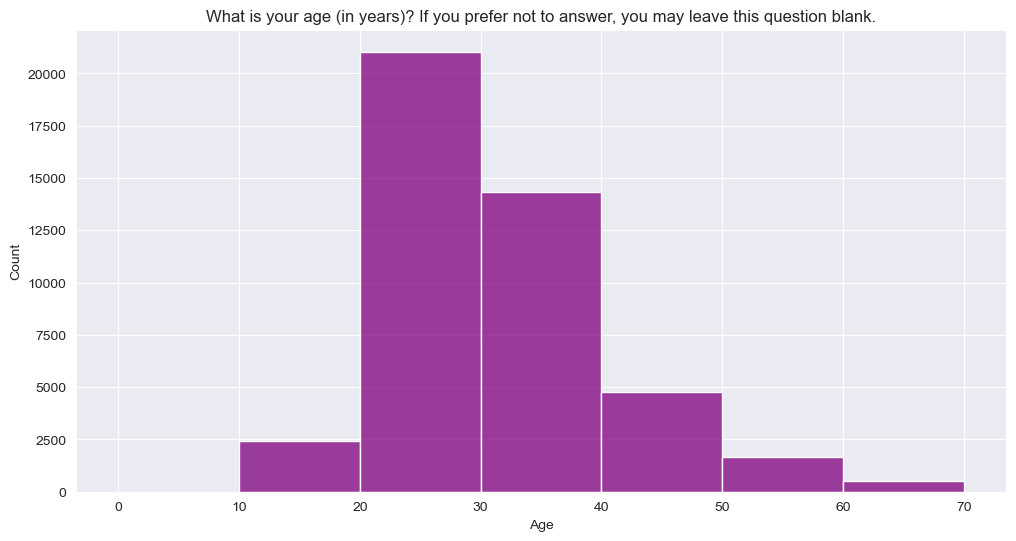

In [20]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(schema.Age)
sns.histplot(survey_df.Age,bins=np.arange(0,80,10),color='purple');

In [21]:
gender_survey = survey_df.Gender.value_counts()

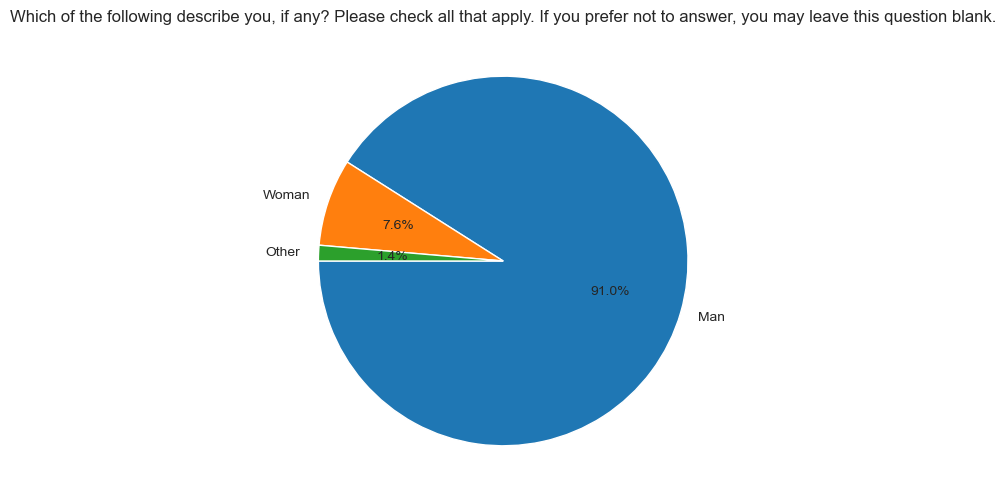

In [22]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title(schema.Gender)
plt.pie(gender_survey,labels=gender_survey.index,autopct='%1.1f%%',startangle=180);

In [23]:
edlevel = survey_df.EdLevel.value_counts()

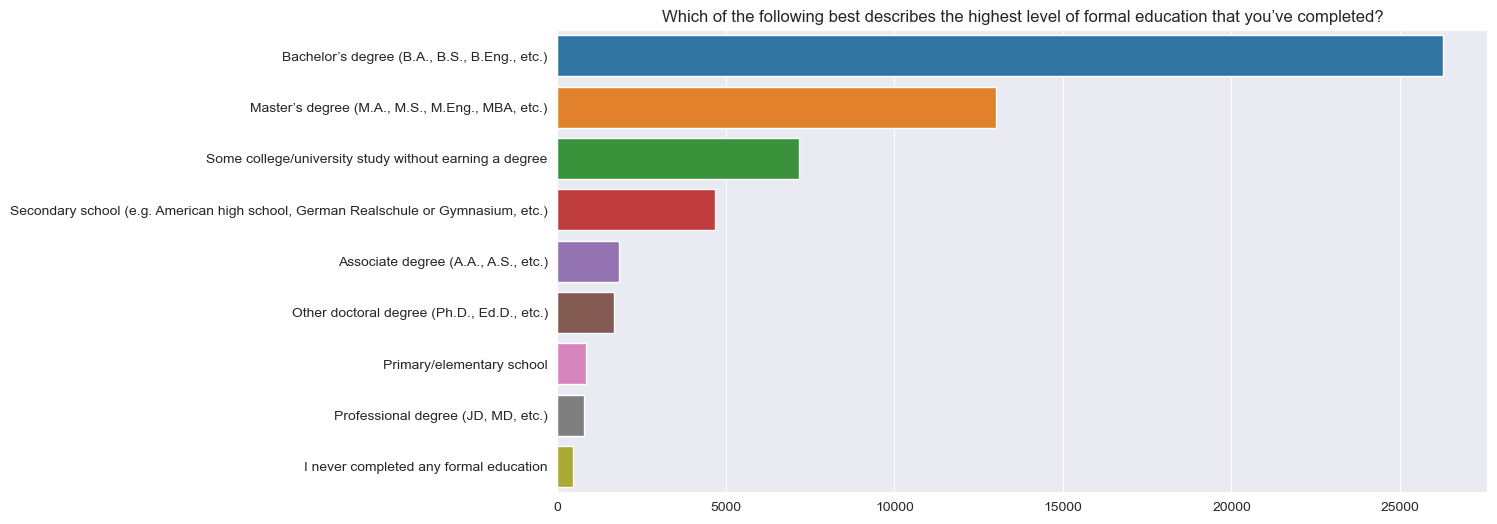

In [24]:
plt.figure(figsize=(12,6))
plt.title(schema.EdLevel)
sns.barplot(x=edlevel.values,y=edlevel.index);

In [25]:
edlevel.rename({'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary School' },inplace = True)

In [26]:
survey_df.NEWEdImpt.value_counts()

Fairly important                      12527
Very important                        11742
Somewhat important                    11266
Not at all important/not necessary     7682
Critically important                   4694
Name: NEWEdImpt, dtype: int64

In [27]:
undergrad_pct = round((survey_df.UndergradMajor.value_counts()) / (survey_df.UndergradMajor.count()) * 100,2)
undergrad_pct

Computer science, computer engineering, or software engineering                   61.92
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.34
Information systems, information technology, or system administration              7.98
A natural science (such as biology, chemistry, physics, etc.)                      4.32
Mathematics or statistics                                                          3.63
Web development or web design                                                      3.49
A business discipline (such as accounting, finance, marketing, etc.)               2.70
A humanities discipline (such as literature, history, philosophy, etc.)            1.99
A social science (such as anthropology, psychology, political science, etc.)       1.84
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.43
I never declared a major                                                           0.88
A health science (such as nursin

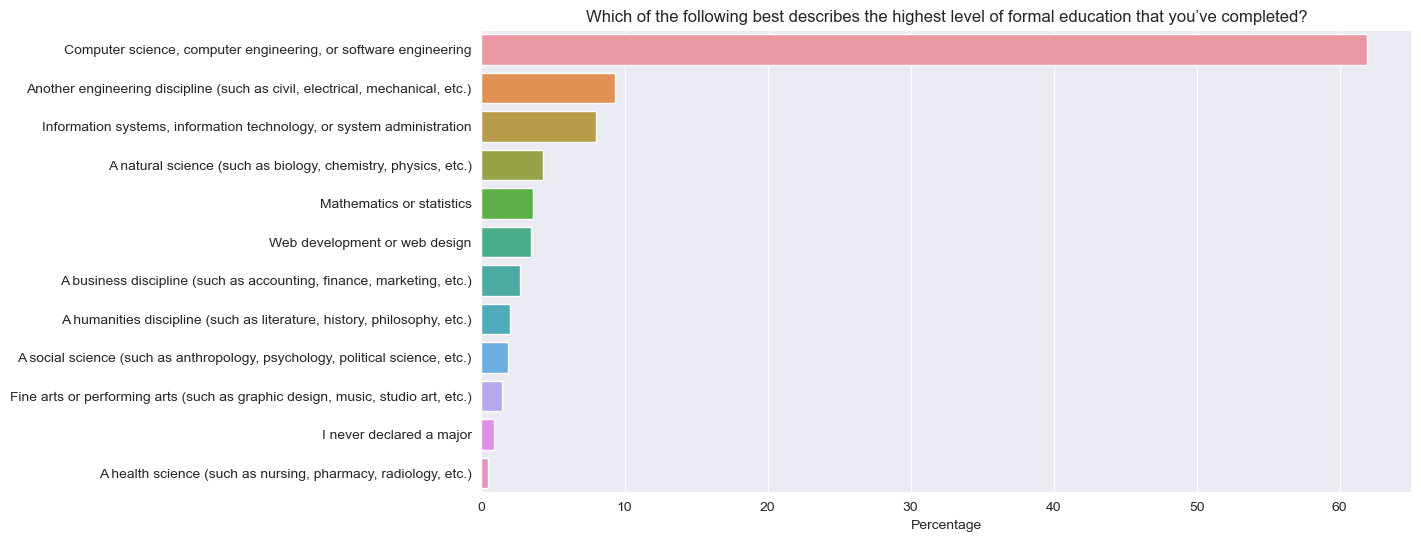

In [28]:
plt.figure(figsize=(12,6))
plt.title(schema.EdLevel)
plt.xlabel('Percentage')
sns.barplot(x=undergrad_pct.values,y=undergrad_pct.index);

In [29]:
Edlevel_group = round(survey_df.groupby('EdLevel')[['Age','YearsCode','YearsCodePro','WorkWeekHrs']].mean().reset_index(),2)
Edlevel_group

,EdLevel,Age,YearsCode,YearsCodePro,WorkWeekHrs
0,"Associate degree (A.A., A.S., etc.)",31.49,12.66,9.20,40.06
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",30.42,12.14,7.98,40.17
2,I never completed any formal education,29.88,10.41,8.88,41.73
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",33.71,15.19,9.61,40.48
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",39.29,20.93,12.56,42.29
5,Primary/elementary school,21.45,7.18,9.26,40.19
6,"Professional degree (JD, MD, etc.)",34.81,15.20,10.25,40.43
7,"Secondary school (e.g. American high school, G...",24.12,8.41,8.52,39.32
8,Some college/university study without earning ...,30.83,13.04,10.08,39.90


In [30]:
list1= ('Master’s degree (M.A., M.S., M.Eng., MBA, etc.','Bachelor’s degree (B.A., B.S., B.Eng., etc.)')

In [31]:
sum1 = survey_df[survey_df['NEWEdImpt'].isin(list1)]
sum2 = sum1['NEWEdImpt'].sum()
sum2

0

In [32]:
survey_df['NEWEdImpt'].unique()

array(['Fairly important', nan, 'Not at all important/not necessary',
       'Very important', 'Somewhat important', 'Critically important'],
      dtype=object)

In [33]:
survey_df.head(1)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important


In [34]:
grouped_data = survey_df.groupby('EdLevel')['NEWEdImpt'].value_counts()

In [35]:
grouped_data

EdLevel                                                                             NEWEdImpt                         
Associate degree (A.A., A.S., etc.)                                                 Somewhat important                     512
                                                                                    Not at all important/not necessary     390
                                                                                    Fairly important                       370
                                                                                    Very important                         206
                                                                                    Critically important                    68
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                        Fairly important                      6734
                                                                                    Very important                     

In [36]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object')

In [37]:
employment = (survey_df.Employment.value_counts()) / (survey_df.Employment.value_counts().sum()) * 100

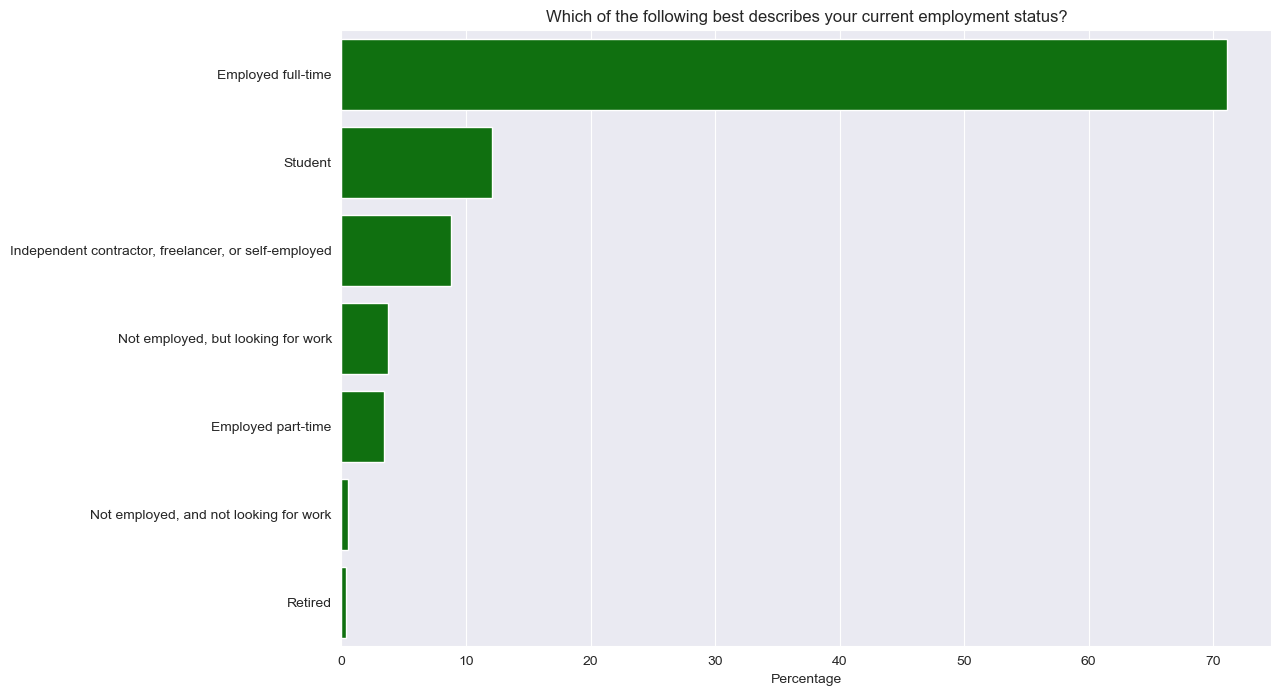

In [38]:
plt.figure(figsize=(12,8))
plt.title(schema.Employment)
plt.xlabel('Percentage')
sns.barplot(x=employment.values,y=employment.index,color='g');

In [39]:
employment = round(employment,2)
employment

Employed full-time                                      71.13
Student                                                 12.05
Independent contractor, freelancer, or self-employed     8.81
Not employed, but looking for work                       3.71
Employed part-time                                       3.43
Not employed, and not looking for work                   0.49
Retired                                                  0.38
Name: Employment, dtype: float64

In [40]:
survey_df.Employment.unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [41]:
survey_df['EmploymentType'] = np.nan

In [42]:
total=[]
for x in survey_df.Employment:
    if x == 'Employed full-time' or x == 'Independent contractor, freelancer, or self-employed':
        total.append('Professional')
    elif x == 'Student' or x == 'Not employed, but looking for work':
        total.append('Enthusiast')
    elif x == 'Not employed, but looking for work':
        total.append('Professional')
    elif x == 'Not employed, and not looking for work' or x == 'Retired':
        total.append('Other')
    else:
        total.append(np.nan)

In [43]:
survey_df.EmploymentType = total

In [44]:
employment_type = survey_df.EmploymentType.value_counts()

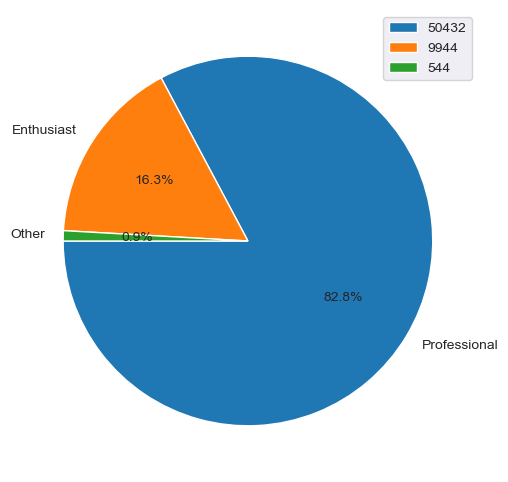

In [45]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.pie(employment_type,labels=employment_type.index,autopct='%1.1f%%',startangle=180);
plt.legend(employment_type.values);

In [46]:
employment_type.value_counts

<bound method IndexOpsMixin.value_counts of Professional    50432
Enthusiast       9944
Other             544
Name: EmploymentType, dtype: int64>

In [47]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [48]:
def multi_column(col_series):
    results_df = col_series.to_frame()
    options = []
    for idx,values in col_series[col_series.notnull()].iteritems():
        for option in values.split(';'):
            if not option in results_df.columns:
                options.append(option)
                results_df[option] = False
            results_df.at[idx,option] = True
    return results_df[options]
                
    

In [49]:
dev_type_df = multi_column(survey_df.DevType)

In [50]:
dev_type_df.sum().sort_values(ascending=False)

Developer, back-end                              26909
Developer, full-stack                            26819
Developer, front-end                             18060
Developer, desktop or enterprise applications    11644
Developer, mobile                                 9338
DevOps specialist                                 5917
Database administrator                            5635
Designer                                          5243
System administrator                              5169
Developer, embedded applications or devices       4682
Data or business analyst                          3974
Data scientist or machine learning specialist     3936
Developer, QA or test                             3899
Engineer, data                                    3691
Academic researcher                               3481
Educator                                          2875
Developer, game or graphics                       2753
Engineering manager                               2697
Product ma

In [51]:
survey_df['Developer, full-stack'] = dev_type_df['Developer, full-stack']

In [52]:
dev_type_df['Gender'] = survey_df['Gender']

In [53]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,EmploymentType,"Developer, full-stack"
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,Professional,True
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,Professional,True
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,...,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary,NaN,False
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,...,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important,Professional,False


In [54]:
language_worked_df = multi_column(survey_df.LanguageWorkedWith)
language_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
worked_languages = language_worked_df.mean().sort_values(ascending = False) * 100

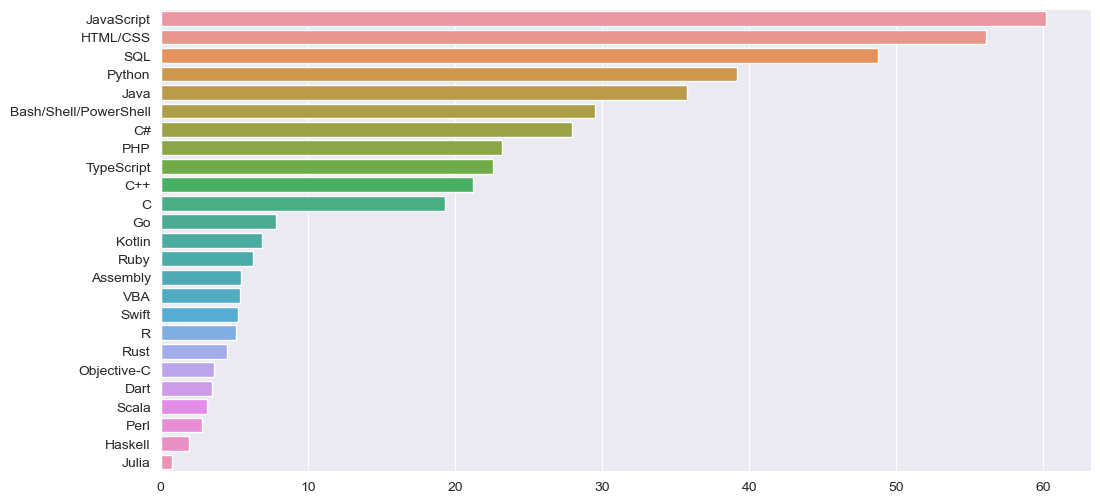

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x=worked_languages,y=worked_languages.index );

In [57]:
languages_interested_df = multi_column(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.381422
JavaScript               40.593204
HTML/CSS                 32.150484
SQL                      31.019972
TypeScript               26.609408
C#                       21.165683
Java                     20.503078
Go                       19.570406
Bash/Shell/PowerShell    18.207512
Rust                     16.415965
C++                      15.056212
Kotlin                   14.806557
PHP                      10.948687
C                         9.391094
Swift                     8.730059
Dart                      7.327911
R                         6.630762
Ruby                      6.487878
Scala                     5.382490
Haskell                   4.657078
Assembly                  3.791923
Julia                     2.571913
Objective-C               2.353662
Perl                      1.780555
VBA                       1.609408
dtype: float64

In [58]:
type(languages_interested_df)

pandas.core.frame.DataFrame

In [59]:
type(language_worked_df)

pandas.core.frame.DataFrame

In [60]:
languages_loved = languages_interested_df & language_worked_df

In [61]:
languages_loved

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
languages_loved_percentage = (languages_loved.sum() * 100 / language_worked_df.sum()).sort_values(ascending = False)

In [63]:
languages_loved_percentage

Rust                     86.178300
TypeScript               67.143353
Python                   66.725465
Kotlin                   62.735314
Go                       62.359325
Dart                     62.210339
Julia                    62.130178
C#                       59.722612
Swift                    59.456229
JavaScript               58.320726
SQL                      56.655400
Bash/Shell/PowerShell    53.684099
HTML/CSS                 53.450014
Scala                    53.353057
Haskell                  51.903974
R                        44.410319
Java                     44.080970
C++                      43.420663
Ruby                     42.874969
PHP                      37.100156
C                        33.046653
Assembly                 29.307384
Perl                     28.595506
Objective-C              23.412527
VBA                      19.540564
dtype: float64

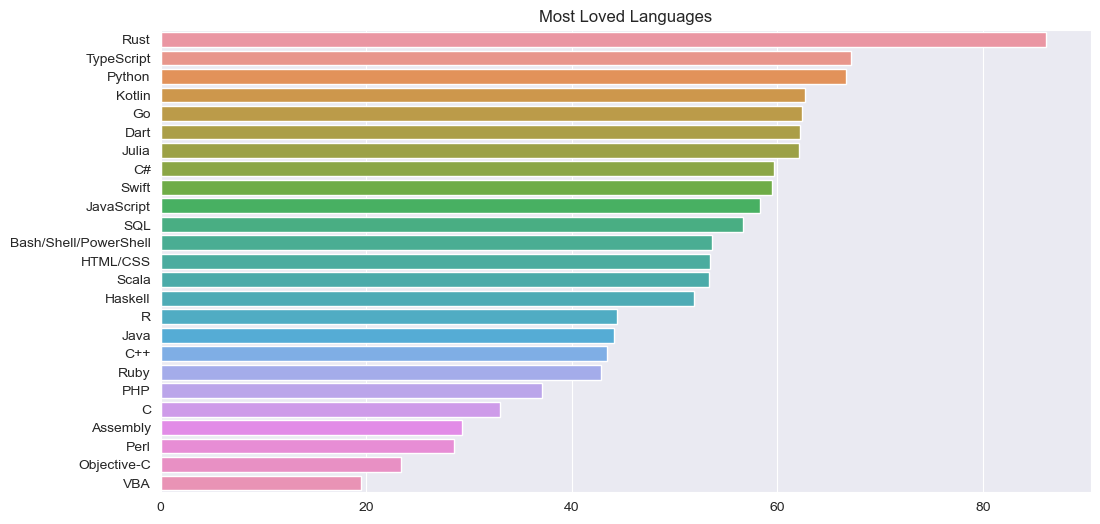

In [64]:
plt.figure(figsize=(12,6))
sns.set(None)
plt.title('Most Loved Languages')
sns.barplot(x=languages_loved_percentage.values,y=languages_loved_percentage.index);

In [65]:
languages_loved_percentage.index

Index(['Rust', 'TypeScript', 'Python', 'Kotlin', 'Go', 'Dart', 'Julia', 'C#',
       'Swift', 'JavaScript', 'SQL', 'Bash/Shell/PowerShell', 'HTML/CSS',
       'Scala', 'Haskell', 'R', 'Java', 'C++', 'Ruby', 'PHP', 'C', 'Assembly',
       'Perl', 'Objective-C', 'VBA'],
      dtype='object')

In [66]:
languages_hated_df = (languages_loved.sum() * 100 / language_worked_df.sum()).sort_values(ascending = True)
languages_hated_df

VBA                      19.540564
Objective-C              23.412527
Perl                     28.595506
Assembly                 29.307384
C                        33.046653
PHP                      37.100156
Ruby                     42.874969
C++                      43.420663
Java                     44.080970
R                        44.410319
Haskell                  51.903974
Scala                    53.353057
HTML/CSS                 53.450014
Bash/Shell/PowerShell    53.684099
SQL                      56.655400
JavaScript               58.320726
Swift                    59.456229
C#                       59.722612
Julia                    62.130178
Dart                     62.210339
Go                       62.359325
Kotlin                   62.735314
Python                   66.725465
TypeScript               67.143353
Rust                     86.178300
dtype: float64

In [67]:
survey_df.loc[survey_df['Employment']=='Student','Gender']=='Woman'

14       False
20       False
27       False
28       False
39        True
         ...  
64421    False
64426    False
64441    False
64444    False
64454    False
Name: Gender, Length: 7605, dtype: bool

In [68]:
df = survey_df.drop(columns=['UndergradMajor','Hobbyist','Age1stCode','YearsCode','YearsCodePro','LanguageDesireNextYear',
'NEWLearn','NEWStuck','Developer, full-stack'])

In [69]:
survey_df.NEWEdImpt.unique()

array(['Fairly important', nan, 'Not at all important/not necessary',
       'Very important', 'Somewhat important', 'Critically important'],
      dtype=object)

In [70]:
dict1 = {"Bachelor's Degree":df.loc[df['EdLevel']=='Bachelor’s degree (B.A., B.S., B.Eng., etc.)','NEWEdImpt'].value_counts(),
         
"Master's Degree":df.loc[df['EdLevel']=='Master’s degree (M.A., M.S., M.Eng., MBA, etc.)','NEWEdImpt'].value_counts(),
         
"Some college/University study without a degree":df.loc[df['EdLevel']=='Some college/university study without earning a degree','NEWEdImpt'].value_counts(),       
         
'Secondary school':df.loc[df['EdLevel']=='Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)','NEWEdImpt'].value_counts(),
         
"Associate degree":df.loc[df['EdLevel']=='Associate degree (A.A., A.S., etc.)','NEWEdImpt'].value_counts(), 
         
"Other doctoral degree":df.loc[df['EdLevel']=='Other doctoral degree (Ph.D., Ed.D., etc.)','NEWEdImpt'].value_counts(),
         
"Primary/elementary school":df.loc[df['EdLevel']=='Primary/elementary school','NEWEdImpt'].value_counts(),         
         
"Professional degree":df.loc[df['EdLevel']=='Professional degree (JD, MD, etc.)','NEWEdImpt'].value_counts(),                  
         
"I never completed any formal education":df.loc[df['EdLevel']=='I never completed any formal education','NEWEdImpt'].value_counts()    }     
         

In [71]:
survey_df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26283
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       12999
Some college/university study without earning a degree                                 7159
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4664
Associate degree (A.A., A.S., etc.)                                                    1833
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1675
Primary/elementary school                                                               837
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  474
Name: EdLevel, dtype: int64

In [72]:
dict1.keys()

dict_keys(["Bachelor's Degree", "Master's Degree", 'Some college/University study without a degree', 'Secondary school', 'Associate degree', 'Other doctoral degree', 'Primary/elementary school', 'Professional degree', 'I never completed any formal education'])

In [73]:
foo = pd.DataFrame(dict1)

In [74]:
foo

,Bachelor's Degree,Master's Degree,Some college/University study without a degree,Secondary school,Associate degree,Other doctoral degree,Primary/elementary school,Professional degree,I never completed any formal education
Critically important,2137,1565,132,57,68,563,15,82,NaN
Fairly important,6734,3413,964,323,370,301,38,176,NaN
Not at all important/not necessary,2771,914,2055,976,390,112,135,108,NaN
Somewhat important,5535,2277,1778,600,512,164,60,140,NaN
Very important,5919,3940,539,205,206,458,44,204,NaN


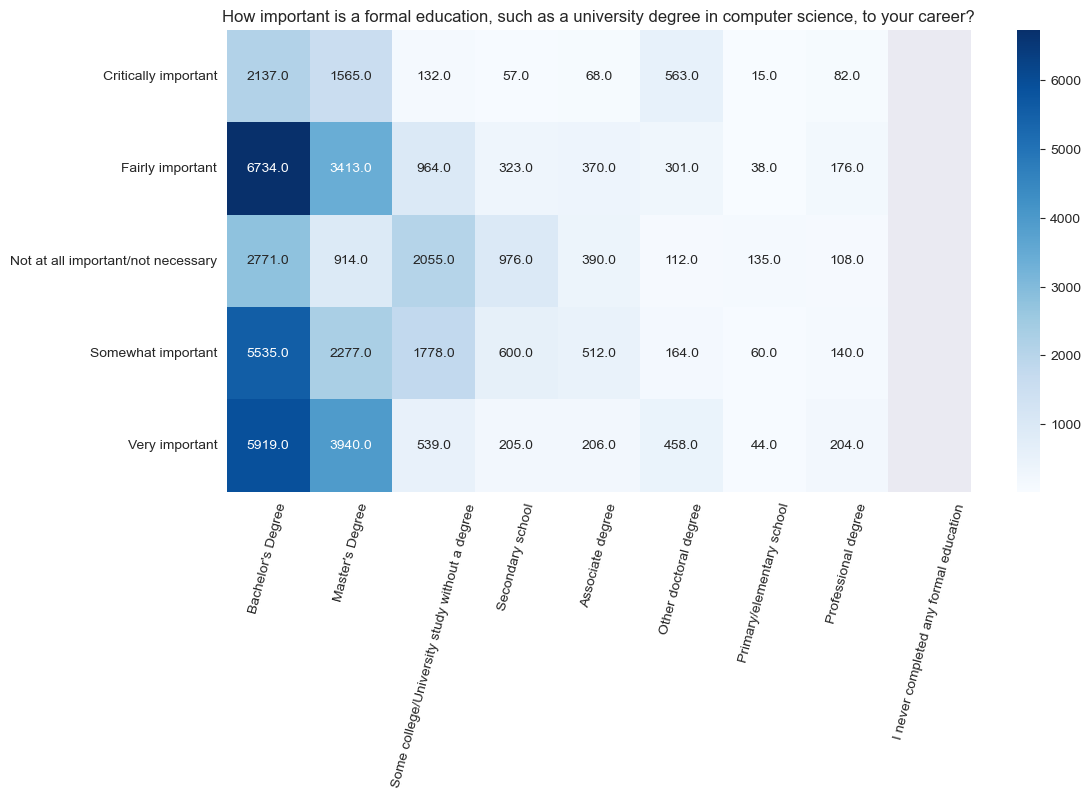

In [75]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.xticks(rotation=75)
plt.title(schema.NEWEdImpt)
sns.heatmap(foo,fmt='',annot=True,cmap='Blues');

In [76]:
worked_hours_df = round(survey_df.groupby('Country')[['WorkWeekHrs','Age']].mean().sort_values('WorkWeekHrs',ascending=False),2)

In [77]:
highest_countries_df = worked_hours_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [78]:
highest_countries_df.reset_index(inplace=True)

In [79]:
highest_countries_df['Continent'] =np.nan

In [80]:
highest_countries_df

,Country,WorkWeekHrs,Age,Continent
0,Iran,45.60,27.68,NaN
1,Israel,43.53,32.66,NaN
2,China,42.13,27.32,NaN
3,United States,41.87,33.73,NaN
4,Turkey,41.43,29.71,NaN
5,South Africa,41.31,31.99,NaN
6,Greece,41.15,31.90,NaN
7,New Zealand,40.67,33.25,NaN
8,India,40.65,25.94,NaN
9,Belgium,40.55,31.35,NaN


In [81]:
total1 = []
for x in highest_countries_df.Country:
    if x == 'Iran' or x == 'Israel' or x == 'China' or x == 'India' or x == 'Bangladesh' or x == 'Pakistan' or x == 'Japan':
        total1.append('Asia')
    elif x == 'United States' or x == 'Canada':
        total1.append('North America')
    elif x == 'Greece' or x == 'Belgium' or x == 'Hungary':
        total1.append('Europe')
    elif x == 'Turkey':
        total1.append('Asia')
    elif x == 'South Africa':
        total1.append('Africa')
    elif x == 'New Zealand':
        total1.append('Oceania')
    else:
        total1.append(np.nan)

In [82]:
highest_countries_df.Continent = total1

In [83]:
highest_countries_df

,Country,WorkWeekHrs,Age,Continent
0,Iran,45.60,27.68,Asia
1,Israel,43.53,32.66,Asia
2,China,42.13,27.32,Asia
3,United States,41.87,33.73,North America
4,Turkey,41.43,29.71,Asia
5,South Africa,41.31,31.99,Africa
6,Greece,41.15,31.90,Europe
7,New Zealand,40.67,33.25,Oceania
8,India,40.65,25.94,Asia
9,Belgium,40.55,31.35,Europe


In [84]:
highest_countries_df.groupby('Continent')[['WorkWeekHrs',"Age"]].mean()

,WorkWeekHrs,Age
Continent,,
Africa,41.310000,31.99000
Asia,41.818750,28.35875
Europe,40.676667,31.32000
North America,41.055000,32.98000
Oceania,40.670000,33.25000


In [85]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'EmploymentType', 'Developer, full-stack'],
      dtype='object')

In [86]:
most_job_hours = round(survey_df.groupby('DevType')[['Age','WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False),2)


In [87]:
most_hours = most_job_hours.loc[survey_df.DevType.value_counts() > 500].head(10)

In [88]:
most_hours.reset_index(inplace=True)

In [89]:
most_hours

,DevType,Age,WorkWeekHrs
0,"Developer, back-end;Developer, desktop or ente...",33.19,40.38
1,"Developer, full-stack",30.97,39.78
2,"Developer, back-end;Developer, desktop or ente...",32.08,39.69
3,"Developer, back-end;Developer, full-stack",30.75,39.56
4,"Developer, back-end;Developer, desktop or ente...",32.73,39.54
5,"Developer, front-end;Developer, full-stack",29.99,39.46
6,"Developer, mobile",29.90,39.46
7,"Developer, desktop or enterprise applications",34.59,39.44
8,"Developer, back-end;Developer, front-end;Devel...",28.56,39.37
9,"Developer, back-end",30.94,39.33


In [90]:
work = survey_df.groupby('Employment')[['Age','WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False)
work

,Age,WorkWeekHrs
Employment,,
Employed full-time,31.933047,40.606446
"Independent contractor, freelancer, or self-employed",35.597240,40.384466
Employed part-time,27.349830,29.286273
"Not employed, and not looking for work",32.327179,NaN
"Not employed, but looking for work",28.641971,NaN
Retired,64.627451,NaN
Student,21.117495,NaN


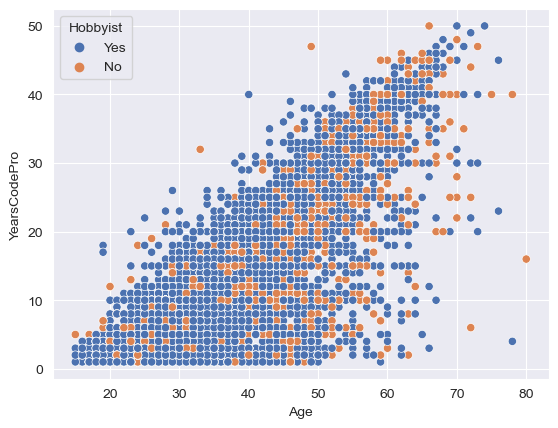

In [91]:
sns.scatterplot(x='Age',y='YearsCodePro',hue='Hobbyist',data=survey_df);

In [92]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'EmploymentType', 'Developer, full-stack'],
      dtype='object')

In [93]:
work_experience = survey_df[survey_df.YearsCodePro > 10]

In [94]:
work_experience.Gender.value_counts()

Man      10755
Woman      524
Other       88
Name: Gender, dtype: int64

In [95]:
survey_df.Gender.value_counts()

Man      45400
Woman     3807
Other      680
Name: Gender, dtype: int64

In [96]:
work_experience.Country.value_counts().head(10)

United States     3674
United Kingdom    1167
Germany            855
Canada             547
Australia          455
France             381
India              374
Brazil             364
Netherlands        348
Italy              320
Name: Country, dtype: int64

In [97]:
us_survey = survey_df[survey_df.Country=='United States'] 
us_survey.Gender.value_counts()

Man      9093
Woman    1081
Other     228
Name: Gender, dtype: int64

In [98]:
gender_df = pd.DataFrame(survey_df.groupby('Country')[['Gender']].value_counts().sort_values(ascending=False),columns=['Counts'])

In [99]:
gender_df.reset_index(inplace=True)
gender_df.head(10)

,Country,Gender,Counts
0,United States,Man,9093
1,India,Man,4914
2,Germany,Man,3080
3,United Kingdom,Man,2877
4,Canada,Man,1599
5,France,Man,1413
6,Brazil,Man,1343
7,United States,Woman,1081
8,Netherlands,Man,1030
9,Poland,Man,1008


In [100]:
gender_df[gender_df.Gender=='Woman'].Counts.sort_values(ascending=False).head(10)

7     1081
27     365
30     322
49     189
53     174
65     104
69      90
71      86
74      76
76      70
Name: Counts, dtype: int64

In [101]:
gender_df.Counts

0      9093
1      4914
2      3080
3      2877
4      1599
       ... 
365       1
366       1
367       1
368       1
369       1
Name: Counts, Length: 370, dtype: int64

In [102]:
gender_df[gender_df.Gender=='Woman'].head(10)

,Country,Gender,Counts
7,United States,Woman,1081
27,India,Woman,365
30,United Kingdom,Woman,322
49,Germany,Woman,189
53,Canada,Woman,174
65,France,Woman,104
69,Australia,Woman,90
71,Netherlands,Woman,86
74,Brazil,Woman,76
76,Romania,Woman,70


In [103]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'EmploymentType', 'Developer, full-stack'],
      dtype='object')

In [104]:
total3 = []
for x in survey_df.YearsCodePro:
    if x > 0 and x <= 5:
        total3.append('Less than 5 Years')
    elif x >= 5 and x <= 10:
        total3.append('Between 5 and 10 Years')
    elif x >= 10 and x <= 15:
        total3.append('Between 10 and 15 Years')
    elif x >= 15 and x <= 20:
        total3.append('Between 15 and 20 Years')
    elif x >= 20 and x <= 25:
        total3.append('Between 20 and 25 Years ')
    elif x >= 25 and x <=30:
        total3.append('Between 25 and 30 Years')
    elif x >= 30 and x <= 35:
        total3.append('Between 30 and 35 Years')
    elif x >= 35 and x <= 40:
        total3.append('Between 35 and 40 Years')
    elif x >= 40 and x <= 45:
        total3.append('Between 40 and 45 Years')
    elif x >= 45 and x <= 50:
        total3.append('Between 45 and 50 Years')
        
    else:
        total3.append(np.nan)

In [105]:
survey_df['Grouped_Years'] = total3

In [106]:
survey_df.Grouped_Years.value_counts()

Less than 5 Years           19836
Between 5 and 10 Years      11077
Between 10 and 15 Years      5553
Between 15 and 20 Years      3388
Between 20 and 25 Years      1934
Between 25 and 30 Years       895
Between 30 and 35 Years       513
Between 35 and 40 Years       316
Between 40 and 45 Years        95
Between 45 and 50 Years        20
Name: Grouped_Years, dtype: int64

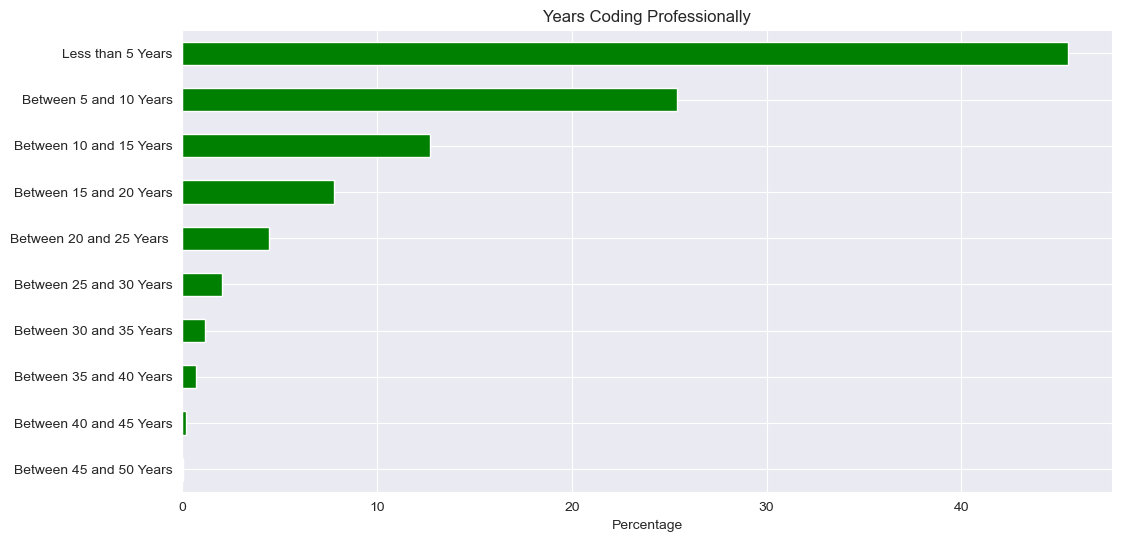

In [107]:
plt.figure(figsize=(12,6))
(survey_df.Grouped_Years.value_counts(normalize=True,ascending=True)*100).plot(kind='barh',color='green')
plt.title('Years Coding Professionally');
plt.xlabel('Percentage');

In [108]:
survey_df.Grouped_Years.value_counts()

Less than 5 Years           19836
Between 5 and 10 Years      11077
Between 10 and 15 Years      5553
Between 15 and 20 Years      3388
Between 20 and 25 Years      1934
Between 25 and 30 Years       895
Between 30 and 35 Years       513
Between 35 and 40 Years       316
Between 40 and 45 Years        95
Between 45 and 50 Years        20
Name: Grouped_Years, dtype: int64